<a href="https://colab.research.google.com/github/tigerak/1st_practice/blob/main/M3_%EC%84%9C%ED%8F%AC%ED%8A%B8%EB%B2%A1%ED%84%B0%EB%A8%B8%EC%8B%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 서포트 벡터 머신
- 회귀, 분류, 이상치 탐지 등에 사용되는 지도학습 방법
- 클래스 사이의 경계에 위치한 데이터 포인트를 서포트벡터라고 함
- 각 서포트벡터가 클래스 사이의 결정 경계를 구분하는데 얼마나 중요한지를 학습
각 서포트 벡터들 사이의 마진이 가장 큰 바향으로 학습
- 서포트 벡터까지의 거리와 서포트 벡터의 중요도를 기반으로 예측 수행

In [94]:
import multiprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [95]:
from sklearn.svm import SVR, SVC # 회귀용 SVR, 분류용 SVC
from sklearn.datasets import load_boston, load_diabetes, load_iris, load_wine, load_breast_cancer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE

## SVM을 이용한 회귀 모델과 분류 모델

SVR 회귀

In [38]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

model = SVR()
model.fit(X_train, y_train)

print('Train Data Score : {}'.format(model.score(X_train, y_train)))
print('Test Data Score : {}'.format(model.score(X_test, y_test)))

Train Data Score : 0.2177283706374875
Test Data Score : 0.13544178468518187


svc 분류

In [39]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

model = SVC()
model.fit(X_train, y_train)

print('Train Data Score : {}'.format(model.score(X_train, y_train)))
print('Test Data Score : {}'.format(model.score(X_test, y_test)))

Train Data Score : 0.9014084507042254
Test Data Score : 0.9230769230769231


## 커널 기법
- 입력 데이터를 고차원 공간에 사상해서 비선형 특징을 학습할 수 있도록 확장하는 방법
- scikit-learn에서는 Linear, Polynomial, RBF(Radial Basis Function)등 다양한 커널 기법을 지원

In [40]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

linear_svr = SVR(kernel='linear')
linear_svr.fit(X_train, y_train)

print('Linear Train Data Score : {}'.format(linear_svr.score(X_train, y_train)))
print('Linear Test Data Score : {}'.format(linear_svr.score(X_test, y_test)))

linear_svr = SVR(kernel='poly')
linear_svr.fit(X_train, y_train)

print('Polynomial Train Data Score : {}'.format(linear_svr.score(X_train, y_train)))
print('Polynomial Test Data Score : {}'.format(linear_svr.score(X_test, y_test)))

linear_svr = SVR(kernel='rbf')
linear_svr.fit(X_train, y_train)

print('RBF Train Data Score : {}'.format(linear_svr.score(X_train, y_train)))
print('RBF Test Data Score : {}'.format(linear_svr.score(X_test, y_test)))

Linear Train Data Score : 0.715506620496448
Linear Test Data Score : 0.6380398541506058
Polynomial Train Data Score : 0.2024454261446289
Polynomial Test Data Score : 0.133668450367462
RBF Train Data Score : 0.2177283706374875
RBF Test Data Score : 0.13544178468518187


In [41]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

linear_svc = SVC(kernel='linear')
linear_svc.fit(X_train, y_train)

print('Linear Train Data Score : {}'.format(linear_svc.score(X_train, y_train)))
print('Linear Test Data Score : {}'.format(linear_svc.score(X_test, y_test)))

linear_svc = SVC(kernel='poly')
linear_svc.fit(X_train, y_train)

print('Polynomial Train Data Score : {}'.format(linear_svc.score(X_train, y_train)))
print('Polynomial Test Data Score : {}'.format(linear_svc.score(X_test, y_test)))

linear_svc = SVC(kernel='rbf')
linear_svc.fit(X_train, y_train)

print('RBF Train Data Score : {}'.format(linear_svc.score(X_train, y_train)))
print('RBF Test Data Score : {}'.format(linear_svc.score(X_test, y_test)))

Linear Train Data Score : 0.960093896713615
Linear Test Data Score : 0.986013986013986
Polynomial Train Data Score : 0.9014084507042254
Polynomial Test Data Score : 0.9230769230769231
RBF Train Data Score : 0.9014084507042254
RBF Test Data Score : 0.9230769230769231


## 매개변수 튜닝
- SVM은 사용하는 커널에 따라 다양한 매개변수 설정 가능
- 매개변수를 변경하면서 성능 변화를 관찰

In [42]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

linear_svc = SVC(kernel='poly', degree=2, C=0.1, gamma='auto')
linear_svc.fit(X_train, y_train)

print('Polynomial Train Data Score : {}'.format(linear_svc.score(X_train, y_train)))
print('Polynomial Test Data Score : {}'.format(linear_svc.score(X_test, y_test)))

linear_svc = SVC(kernel='rbf', C=2.0, gamma='scale')
linear_svc.fit(X_train, y_train)

print('RBF Train Data Score : {}'.format(linear_svc.score(X_train, y_train)))
print('RBF Test Data Score : {}'.format(linear_svc.score(X_test, y_test)))

Polynomial Train Data Score : 0.9835680751173709
Polynomial Test Data Score : 0.993006993006993
RBF Train Data Score : 0.9154929577464789
RBF Test Data Score : 0.9370629370629371


## 데이터 전처리

-SVM은 입력 데이터가 정규화되어야 좋은 성능을 보임
- 주도 모든 특성 값을 [0, 1] 범위로 맞추는 방법을 사용
- scikit-learn의 StandardScaler 또는 MinMaxScaler를 사용해 정규화

In [43]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

linear_svc = SVC()
linear_svc.fit(X_train, y_train)

print('SVC Train Data Score : {}'.format(linear_svc.score(X_train, y_train)))
print('SVC Test Data Score : {}'.format(linear_svc.score(X_test, y_test)))

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

linear_svc = SVC()
linear_svc.fit(X_train, y_train)

print('SVC StandardScaler전처리 Train Data Score : {}'.format(linear_svc.score(X_train, y_train)))
print('SVC StandardScaler전처리 Test Data Score : {}'.format(linear_svc.score(X_test, y_test)))

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

linear_svc = SVC()
linear_svc.fit(X_train, y_train)

print('SVC MinMaxScaler전처리 Train Data Score : {}'.format(linear_svc.score(X_train, y_train)))
print('SVC MinMaxScaler전처리 Test Data Score : {}'.format(linear_svc.score(X_test, y_test)))

SVC Train Data Score : 0.9014084507042254
SVC Test Data Score : 0.9230769230769231
SVC StandardScaler전처리 Train Data Score : 0.9835680751173709
SVC StandardScaler전처리 Test Data Score : 0.986013986013986
SVC MinMaxScaler전처리 Train Data Score : 0.9812206572769953
SVC MinMaxScaler전처리 Test Data Score : 0.986013986013986


# Linear SVR

## 보스턴 주택 가격

In [44]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

linear_svr = SVR(kernel='linear')
linear_svr.fit(X_train, y_train)

print('Train Data Score : {}'.format(linear_svr.score(X_train, y_train)))
print('Test Data Score : {}'.format(linear_svr.score(X_test, y_test)))

Train Data Score : 0.691016501096553
Test Data Score : 0.7623420514498938


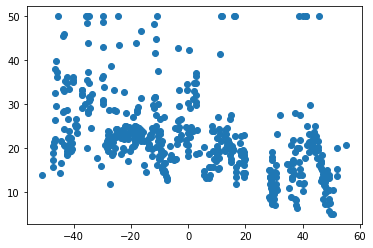

In [45]:
X_comp = TSNE(n_components=1).fit_transform(X) #서보트벡터는 차원을 늘려서 맵핑하기 떄문에 차원을 낮춰야 시각화 가능
plt.scatter(X_comp, y);

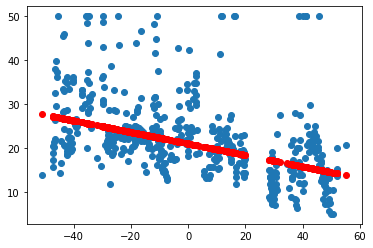

In [46]:
linear_svr.fit(X_comp, y)
predict = linear_svr.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color='r');

In [47]:
estimator = make_pipeline(StandardScaler(), SVR(kernel='linear'))

cross_validate(estimator=estimator, X=X, y=y, cv=5, \
               n_jobs=multiprocessing.cpu_count(), verbose=True)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.9s finished


{'fit_time': array([0.02858305, 0.02850533, 0.02626109, 0.0267365 , 0.02292061]),
 'score_time': array([0.00208998, 0.00221229, 0.00197315, 0.00204158, 0.00130677]),
 'test_score': array([0.76908568, 0.72180141, 0.56428426, 0.14083339, 0.07810211])}

In [48]:
pipe = Pipeline([('scler', StandardScaler()), ('model', SVR(kernel='linear'))])

param_grid = [{'model__gamma':['scale', 'auto'], 'model__C':[1.0, 0.1, 0.01], \
               'model__epsilon':[1.0, 0.1, 0.01]}]

gs = GridSearchCV(estimator=pipe, param_grid=param_grid, \
                  n_jobs=multiprocessing.cpu_count(), cv=5, verbose=True)

gs.fit(X, y)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=2)]: Done  90 out of  90 | elapsed:    1.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SVR(C=1.0, cache_size=200, coef0=0.0,
                                            degree=3, epsilon=0.1,
                                            gamma='scale', kernel='linear',
                                            max_iter=-1, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False),
             iid='deprecated', n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamm

In [49]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('scler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=1.0,
                     gamma='scale', kernel='linear', max_iter=-1,
                     shrinking=True, tol=0.001, verbose=False))],
         verbose=False)

## 당뇨병

In [50]:
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

linear_svr = SVR(kernel='linear')
linear_svr.fit(X_train, y_train)

print('Train Data Score : {}'.format(linear_svr.score(X_train, y_train)))
print('Test Data Score : {}'.format(linear_svr.score(X_test, y_test)))

Train Data Score : 0.5270549599167367
Test Data Score : 0.4383268226553668


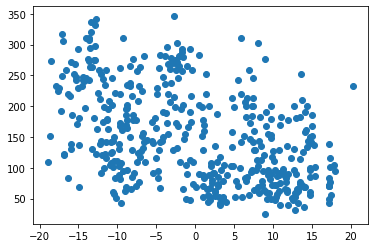

In [51]:
X_comp = TSNE(n_components=1).fit_transform(X) #서보트벡터는 차원을 늘려서 맵핑하기 떄문에 차원을 낮춰야 시각화 가능
plt.scatter(X_comp, y);

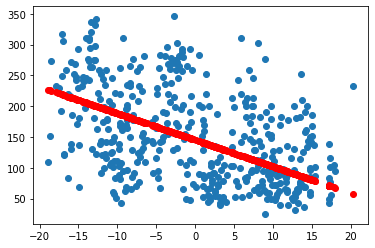

In [52]:
linear_svr.fit(X_comp, y)
predict = linear_svr.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color='r');

In [53]:
estimator = make_pipeline(StandardScaler(), SVR(kernel='linear'))

cross_validate(estimator=estimator, X=X, y=y, cv=5, \
               n_jobs=multiprocessing.cpu_count(), verbose=True)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished


{'fit_time': array([0.02775407, 0.02557135, 0.01045108, 0.01132488, 0.01149225]),
 'score_time': array([0.0052247 , 0.00183654, 0.00156522, 0.0015986 , 0.00106287]),
 'test_score': array([0.43037242, 0.51653341, 0.48275332, 0.42247202, 0.53076481])}

In [54]:
pipe = Pipeline([('scler', StandardScaler()), ('model', SVR(kernel='linear'))])

param_grid = [{'model__gamma':['scale', 'auto'], 'model__C':[1.0, 0.1, 0.01], \
               'model__epsilon':[1.0, 0.1, 0.01]}]

gs = GridSearchCV(estimator=pipe, param_grid=param_grid, \
                  n_jobs=multiprocessing.cpu_count(), cv=5, verbose=True)

gs.fit(X, y)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=2)]: Done  90 out of  90 | elapsed:    0.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SVR(C=1.0, cache_size=200, coef0=0.0,
                                            degree=3, epsilon=0.1,
                                            gamma='scale', kernel='linear',
                                            max_iter=-1, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False),
             iid='deprecated', n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamm

In [55]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('scler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=1.0,
                     gamma='scale', kernel='linear', max_iter=-1,
                     shrinking=True, tol=0.001, verbose=False))],
         verbose=False)

# Kernal SVR

### 보스턴 주택

In [56]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

linear_svr = SVR(kernel='rbf')
linear_svr.fit(X_train, y_train)

print('Train Data Score : {}'.format(linear_svr.score(X_train, y_train)))
print('Test Data Score : {}'.format(linear_svr.score(X_test, y_test)))

Train Data Score : 0.6689497279602121
Test Data Score : 0.6473911285320149


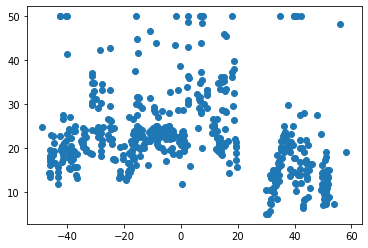

In [57]:
X_comp = TSNE(n_components=1).fit_transform(X) #서보트벡터는 차원을 늘려서 맵핑하기 떄문에 차원을 낮춰야 시각화 가능
plt.scatter(X_comp, y);

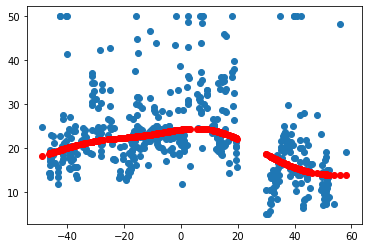

In [58]:
linear_svr.fit(X_comp, y)
predict = linear_svr.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color='r');

In [59]:
estimator = make_pipeline(StandardScaler(), SVR(kernel='rbf'))

cross_validate(estimator=estimator, X=X, y=y, cv=5, \
               n_jobs=multiprocessing.cpu_count(), verbose=True)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished


{'fit_time': array([0.02700233, 0.02389765, 0.01989365, 0.01931882, 0.01494622]),
 'score_time': array([0.00355077, 0.0034101 , 0.00342607, 0.00359988, 0.00222206]),
 'test_score': array([ 0.75781445,  0.50211018,  0.04310107,  0.33851703, -0.75997942])}

In [60]:
pipe = Pipeline([('scler', StandardScaler()), ('model', SVR(kernel='rbf'))])

param_grid = [{'model__kernel':['rbf', 'polynomial', 'sigmoid']}]

gs = GridSearchCV(estimator=pipe, param_grid=param_grid, \
                  n_jobs=multiprocessing.cpu_count(), cv=5, verbose=True)

gs.fit(X, y)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=2)]: Done  12 out of  15 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  15 out of  15 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SVR(C=1.0, cache_size=200, coef0=0.0,
                                            degree=3, epsilon=0.1,
                                            gamma='scale', kernel='rbf',
                                            max_iter=-1, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False),
             iid='deprecated', n_jobs=2,
             param_grid=[{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
    

In [61]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('scler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                     gamma='scale', kernel='rbf', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [62]:
pipe = Pipeline([('scler', StandardScaler()), ('model', SVR(kernel='rbf'))])

param_grid = [{'model__gamma':['scale', 'auto'], 'model__C':[1.0, 0.1, 0.01], \
               'model__epsilon':[1.0, 0.1, 0.01]}]

gs = GridSearchCV(estimator=pipe, param_grid=param_grid, \
                  n_jobs=multiprocessing.cpu_count(), cv=5, verbose=True)

gs.fit(X, y)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=2)]: Done  90 out of  90 | elapsed:    1.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SVR(C=1.0, cache_size=200, coef0=0.0,
                                            degree=3, epsilon=0.1,
                                            gamma='scale', kernel='rbf',
                                            max_iter=-1, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False),
             iid='deprecated', n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma':

In [63]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('scler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.01,
                     gamma='scale', kernel='rbf', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

## 당뇨병

In [64]:
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

linear_svr = SVR(kernel='rbf')
linear_svr.fit(X_train, y_train)

print('Train Data Score : {}'.format(linear_svr.score(X_train, y_train)))
print('Test Data Score : {}'.format(linear_svr.score(X_test, y_test)))

Train Data Score : 0.17515110187232985
Test Data Score : 0.17640578924648354


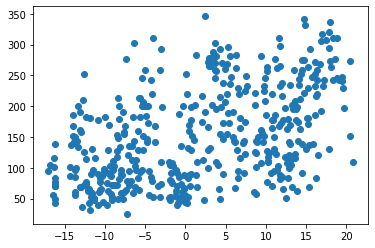

In [65]:
X_comp = TSNE(n_components=1).fit_transform(X) #서보트벡터는 차원을 늘려서 맵핑하기 떄문에 차원을 낮춰야 시각화 가능
plt.scatter(X_comp, y);

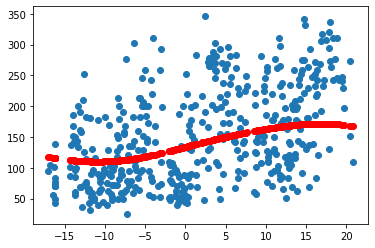

In [66]:
linear_svr.fit(X_comp, y)
predict = linear_svr.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color='r');

In [67]:
estimator = make_pipeline(StandardScaler(), SVR(kernel='rbf'))

cross_validate(estimator=estimator, X=X, y=y, cv=5, \
               n_jobs=multiprocessing.cpu_count(), verbose=True)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished


{'fit_time': array([0.01396275, 0.03865719, 0.01728106, 0.01358366, 0.01288557]),
 'score_time': array([0.00295997, 0.00284982, 0.00309706, 0.00270796, 0.00190616]),
 'test_score': array([0.14580789, 0.12539919, 0.18163816, 0.12223073, 0.15792085])}

In [68]:
pipe = Pipeline([('scler', StandardScaler()), ('model', SVR(kernel='rbf'))])

param_grid = [{'model__kernel':['rbf', 'polynomial', 'sigmoid']}]

gs = GridSearchCV(estimator=pipe, param_grid=param_grid, \
                  n_jobs=multiprocessing.cpu_count(), cv=5, verbose=True)

gs.fit(X, y)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=2)]: Done  15 out of  15 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SVR(C=1.0, cache_size=200, coef0=0.0,
                                            degree=3, epsilon=0.1,
                                            gamma='scale', kernel='rbf',
                                            max_iter=-1, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False),
             iid='deprecated', n_jobs=2,
             param_grid=[{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
    

In [69]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('scler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                     gamma='scale', kernel='sigmoid', max_iter=-1,
                     shrinking=True, tol=0.001, verbose=False))],
         verbose=False)

In [70]:
pipe = Pipeline([('scler', StandardScaler()), ('model', SVR(kernel='sigmoid'))])

param_grid = [{'model__gamma':['scale', 'auto'], 'model__C':[1.0, 0.1, 0.01], \
               'model__epsilon':[1.0, 0.1, 0.01]}]

gs = GridSearchCV(estimator=pipe, param_grid=param_grid, \
                  n_jobs=multiprocessing.cpu_count(), cv=5, verbose=True)

gs.fit(X, y)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=2)]: Done  90 out of  90 | elapsed:    1.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SVR(C=1.0, cache_size=200, coef0=0.0,
                                            degree=3, epsilon=0.1,
                                            gamma='scale', kernel='sigmoid',
                                            max_iter=-1, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False),
             iid='deprecated', n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gam

In [71]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('scler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=1.0,
                     gamma='auto', kernel='sigmoid', max_iter=-1,
                     shrinking=True, tol=0.001, verbose=False))],
         verbose=False)

In [72]:
model = gs.best_estimator_
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=1.0,
                     gamma='auto', kernel='sigmoid', max_iter=-1,
                     shrinking=True, tol=0.001, verbose=False))],
         verbose=False)

In [73]:
print('Train Data Score : {}'.format(model.score(X_train, y_train)))
print('Test Data Score : {}'.format(model.score(X_test, y_test)))

Train Data Score : 0.38562172802845807
Test Data Score : 0.34289716096404177


# Linear SVC

## 유방암

In [92]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

linear_svc = SVC(kernel='linear')
linear_svc.fit(X_train, y_train)

print('Train Data Score : {}'.format(linear_svc.score(X_train, y_train)))
print('Test Data Score : {}'.format(linear_svc.score(X_test, y_test)))

Train Data Score : 0.9868131868131869
Test Data Score : 0.9649122807017544


In [75]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    return xx, yy

In [97]:
def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)

    return out

In [98]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

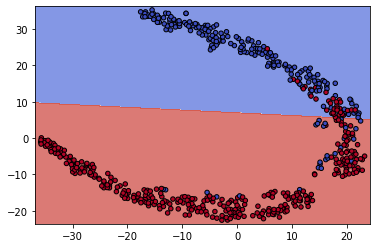

In [99]:
linear_svc.fit(X_comp, y)

plot_contours(linear_svc, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)

plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
# 고차원 공간에서의 분류를 저차원에서 보고 있는 것이므로 평면상 보이는 것과 다를 수 있음음

In [105]:
estimator = make_pipeline(StandardScaler(), SVC(kernel='linear'))

cross_validate(estimator=estimator, X=X, y=y, cv=5, \
               n_jobs=multiprocessing.cpu_count(), verbose=True)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.01050353, 0.00658846, 0.00674391, 0.00564003, 0.00523853]),
 'score_time': array([0.0009141 , 0.00105166, 0.00085378, 0.00096059, 0.00060892]),
 'test_score': array([0.96491228, 0.98245614, 0.96491228, 0.96491228, 0.98230088])}

In [107]:
'''
pipe = Pipeline([('scler', StandardScaler()), ('model', SVC(kernel='linear'))])

param_grid = [{'model__kernel':['rbf', 'polynomial', 'sigmoid']}]

gs = GridSearchCV(estimator=pipe, param_grid=param_grid, \
                  n_jobs=multiprocessing.cpu_count(), cv=5, verbose=True)

gs.fit(X, y)
'''

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  15 out of  15 | elapsed:    0.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='linear', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0

In [102]:
'''
gs.best_estimator_
'''

Pipeline(memory=None,
         steps=[('scler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                     gamma='scale', kernel='rbf', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [127]:
pipe = Pipeline([('scler', StandardScaler()), ('model', SVC(kernel='linear'))])

param_grid = [{'model__gamma':['scale', 'auto'], 'model__C':[1.0, 0.1, 0.01]}]

gs = GridSearchCV(estimator=pipe, param_grid=param_grid, \
                  n_jobs=multiprocessing.cpu_count(), cv=5, verbose=True)

gs.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    0.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='linear', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0

In [110]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('scler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='linear', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [111]:
model = gs.best_estimator_
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='linear', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [112]:
print('Train Data Score : {}'.format(model.score(X_train, y_train)))
print('Test Data Score : {}'.format(model.score(X_test, y_test)))

Train Data Score : 0.9846153846153847
Test Data Score : 0.9649122807017544


## IRIS

In [113]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

linear_svc = SVC(kernel='linear')
linear_svc.fit(X_train, y_train)

print('Train Data Score : {}'.format(linear_svc.score(X_train, y_train)))
print('Test Data Score : {}'.format(linear_svc.score(X_test, y_test)))

Train Data Score : 0.9666666666666667
Test Data Score : 0.9666666666666667


In [114]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    return xx, yy

In [115]:
def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)

    return out

In [116]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

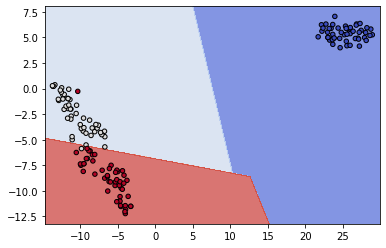

In [117]:
linear_svc.fit(X_comp, y)

plot_contours(linear_svc, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)

plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [118]:
estimator = make_pipeline(StandardScaler(), SVC(kernel='linear'))

cross_validate(estimator=estimator, X=X, y=y, cv=5, \
               n_jobs=multiprocessing.cpu_count(), verbose=True)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.8s finished


{'fit_time': array([0.00279856, 0.00243807, 0.00187302, 0.0015614 , 0.00160456]),
 'score_time': array([0.00071478, 0.00067997, 0.00057793, 0.00054288, 0.00059104]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.93333333, 1.        ])}

In [119]:
'''
pipe = Pipeline([('scler', StandardScaler()), ('model', SVC(kernel='linear'))])

param_grid = [{'model__kernel':['rbf', 'polynomial', 'sigmoid']}]

gs = GridSearchCV(estimator=pipe, param_grid=param_grid, \
                  n_jobs=multiprocessing.cpu_count(), cv=5, verbose=True)

gs.fit(X, y)
'''

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  15 out of  15 | elapsed:    0.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='linear', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0

In [120]:
'''
gs.best_estimator_
'''

Pipeline(memory=None,
         steps=[('scler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [121]:
pipe = Pipeline([('scler', StandardScaler()), ('model', SVC(kernel='linear'))])

param_grid = [{'model__gamma':['scale', 'auto'], 'model__C':[1.0, 0.1, 0.01]}]

gs = GridSearchCV(estimator=pipe, param_grid=param_grid, \
                  n_jobs=multiprocessing.cpu_count(), cv=5, verbose=True)

gs.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    0.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='linear', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0

In [123]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('scler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='linear', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [124]:
model = gs.best_estimator_
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='linear', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [125]:
print('Train Data Score : {}'.format(model.score(X_train, y_train)))
print('Test Data Score : {}'.format(model.score(X_test, y_test)))

Train Data Score : 0.9666666666666667
Test Data Score : 0.9666666666666667


## wine

In [133]:
X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

linear_svc = SVC(kernel='linear')
linear_svc.fit(X_train, y_train)

print('Train Data Score : {}'.format(linear_svc.score(X_train, y_train)))
print('Test Data Score : {}'.format(linear_svc.score(X_test, y_test)))

Train Data Score : 1.0
Test Data Score : 0.9444444444444444


In [134]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    return xx, yy

In [135]:
def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)

    return out

In [136]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

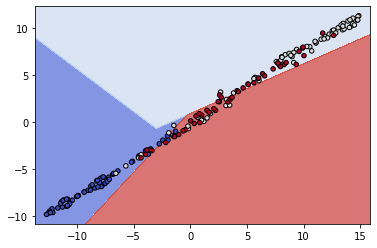

In [137]:
linear_svc.fit(X_comp, y)

plot_contours(linear_svc, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)

plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [138]:
estimator = make_pipeline(StandardScaler(), SVC(kernel='linear'))

cross_validate(estimator=estimator, X=X, y=y, cv=5, \
               n_jobs=multiprocessing.cpu_count(), verbose=True)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.8s finished


{'fit_time': array([0.00302339, 0.00225425, 0.00296474, 0.00229239, 0.00211239]),
 'score_time': array([0.00077581, 0.0006187 , 0.00071502, 0.00071383, 0.0006597 ]),
 'test_score': array([0.94444444, 0.97222222, 0.97222222, 0.97142857, 0.94285714])}

In [ ]:
'''
pipe = Pipeline([('scler', StandardScaler()), ('model', SVC(kernel='linear'))])

param_grid = [{'model__kernel':['rbf', 'polynomial', 'sigmoid']}]

gs = GridSearchCV(estimator=pipe, param_grid=param_grid, \
                  n_jobs=multiprocessing.cpu_count(), cv=5, verbose=True)

gs.fit(X, y)
'''

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  15 out of  15 | elapsed:    0.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='linear', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0

In [ ]:
'''
gs.best_estimator_
'''

Pipeline(memory=None,
         steps=[('scler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [139]:
pipe = Pipeline([('scler', StandardScaler()), ('model', SVC(kernel='linear'))])

param_grid = [{'model__gamma':['scale', 'auto'], 'model__C':[1.0, 0.1, 0.01]}]

gs = GridSearchCV(estimator=pipe, param_grid=param_grid, \
                  n_jobs=multiprocessing.cpu_count(), cv=5, verbose=True)

gs.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    0.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='linear', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0

In [140]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('scler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='linear', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [141]:
model = gs.best_estimator_
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='linear', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [142]:
print('Train Data Score : {}'.format(model.score(X_train, y_train)))
print('Test Data Score : {}'.format(model.score(X_test, y_test)))

Train Data Score : 0.9929577464788732
Test Data Score : 1.0


# kernel SVC

## 유방암

In [147]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

kernel_svc = SVC(kernel='rbf')
kernel_svc.fit(X_train, y_train)

print('Train Data Score : {}'.format(kernel_svc.score(X_train, y_train)))
print('Test Data Score : {}'.format(kernel_svc.score(X_test, y_test)))

Train Data Score : 0.9868131868131869
Test Data Score : 0.9736842105263158


In [148]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    return xx, yy

In [149]:
def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)

    return out

In [150]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

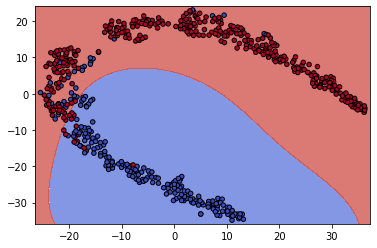

In [151]:
kernel_svc.fit(X_comp, y)

plot_contours(kernel_svc, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)

plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [187]:
estimator = make_pipeline(StandardScaler(), SVC(kernel='rbf'))

cross_validate(estimator=estimator, X=X, y=y, cv=5, \
               n_jobs=multiprocessing.cpu_count(), verbose=True)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00496197, 0.00314474, 0.00271344, 0.00439477, 0.0025363 ]),
 'score_time': array([0.00081229, 0.00075674, 0.00080705, 0.00076556, 0.00048804]),
 'test_score': array([1.        , 0.97222222, 0.94444444, 1.        , 1.        ])}

In [188]:
pipe = Pipeline([('scler', StandardScaler()), ('model', SVC(kernel='rbf'))])

param_grid = [{'model__kernel':['rbf', 'polynomial', 'sigmoid']}]

gs = GridSearchCV(estimator=pipe, param_grid=param_grid, \
                  n_jobs=multiprocessing.cpu_count(), cv=5, verbose=True)

gs.fit(X, y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  15 out of  15 | elapsed:    0.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.00

In [189]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('scler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [190]:
pipe = Pipeline([('scler', StandardScaler()), ('model', SVC(kernel='rbf'))])

param_grid = [{'model__gamma':['scale', 'auto'], 'model__C':[1.0, 0.1, 0.01]}]

gs = GridSearchCV(estimator=pipe, param_grid=param_grid, \
                  n_jobs=multiprocessing.cpu_count(), cv=5, verbose=True)

gs.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    0.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.00

In [191]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('scler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [192]:
model = gs.best_estimator_
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [193]:
print('Train Data Score : {}'.format(model.score(X_train, y_train)))
print('Test Data Score : {}'.format(model.score(X_test, y_test)))

Train Data Score : 1.0
Test Data Score : 0.9722222222222222


## IRIS

In [163]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

kernel_svc = SVC(kernel='rbf')
kernel_svc.fit(X_train, y_train)

print('Train Data Score : {}'.format(kernel_svc.score(X_train, y_train)))
print('Test Data Score : {}'.format(kernel_svc.score(X_test, y_test)))

Train Data Score : 0.9666666666666667
Test Data Score : 0.9666666666666667


In [164]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    return xx, yy

In [165]:
def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)

    return out

In [166]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

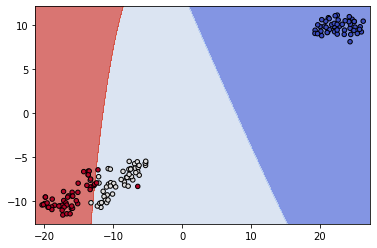

In [167]:
kernel_svc.fit(X_comp, y)

plot_contours(kernel_svc, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)

plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [194]:
estimator = make_pipeline(StandardScaler(), SVC(kernel='rbf'))

cross_validate(estimator=estimator, X=X, y=y, cv=5, \
               n_jobs=multiprocessing.cpu_count(), verbose=True)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00207162, 0.00311208, 0.00183105, 0.00243044, 0.00191021]),
 'score_time': array([0.00057578, 0.00062799, 0.00050521, 0.00057292, 0.00051785]),
 'test_score': array([1.        , 0.97222222, 0.94444444, 1.        , 1.        ])}

In [195]:
pipe = Pipeline([('scler', StandardScaler()), ('model', SVC(kernel='rbf'))])

param_grid = [{'model__kernel':['rbf', 'polynomial', 'sigmoid']}]

gs = GridSearchCV(estimator=pipe, param_grid=param_grid, \
                  n_jobs=multiprocessing.cpu_count(), cv=5, verbose=True)

gs.fit(X, y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  15 out of  15 | elapsed:    0.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.00

In [196]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('scler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [197]:
pipe = Pipeline([('scler', StandardScaler()), ('model', SVC(kernel='rbf'))])

param_grid = [{'model__gamma':['scale', 'auto'], 'model__C':[1.0, 0.1, 0.01]}]

gs = GridSearchCV(estimator=pipe, param_grid=param_grid, \
                  n_jobs=multiprocessing.cpu_count(), cv=5, verbose=True)

gs.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    0.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.00

In [198]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('scler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [199]:
model = gs.best_estimator_
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [200]:
print('Train Data Score : {}'.format(model.score(X_train, y_train)))
print('Test Data Score : {}'.format(model.score(X_test, y_test)))

Train Data Score : 1.0
Test Data Score : 0.9722222222222222


## wine

In [214]:
X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

kernel_svc = SVC(kernel='rbf')
kernel_svc.fit(X_train, y_train)

print('Train Data Score : {}'.format(kernel_svc.score(X_train, y_train)))
print('Test Data Score : {}'.format(kernel_svc.score(X_test, y_test)))

Train Data Score : 1.0
Test Data Score : 0.9722222222222222


In [215]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    return xx, yy

In [216]:
def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)

    return out

In [217]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

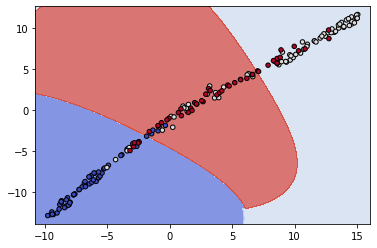

In [218]:
kernel_svc.fit(X_comp, y)

plot_contours(kernel_svc, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)

plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [219]:
estimator = make_pipeline(StandardScaler(), SVC(kernel='rbf'))

cross_validate(estimator=estimator, X=X, y=y, cv=5, \
               n_jobs=multiprocessing.cpu_count(), verbose=True)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.0035162 , 0.00199652, 0.00269389, 0.00317311, 0.0025835 ]),
 'score_time': array([0.00541639, 0.00052071, 0.00079036, 0.00075889, 0.00070977]),
 'test_score': array([1.        , 0.97222222, 0.94444444, 1.        , 1.        ])}

In [220]:
pipe = Pipeline([('scler', StandardScaler()), ('model', SVC(kernel='rbf'))])

param_grid = [{'model__kernel':['rbf', 'polynomial', 'sigmoid']}]

gs = GridSearchCV(estimator=pipe, param_grid=param_grid, \
                  n_jobs=multiprocessing.cpu_count(), cv=5, verbose=True)

gs.fit(X, y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  15 out of  15 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.00

In [221]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('scler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [222]:
pipe = Pipeline([('scler', StandardScaler()), ('model', SVC(kernel='rbf'))])

param_grid = [{'model__gamma':['scale', 'auto'], 'model__C':[1.0, 0.1, 0.01]}]

gs = GridSearchCV(estimator=pipe, param_grid=param_grid, \
                  n_jobs=multiprocessing.cpu_count(), cv=5, verbose=True)

gs.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    0.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.00

In [223]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('scler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [224]:
model = gs.best_estimator_
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [225]:
print('Train Data Score : {}'.format(model.score(X_train, y_train)))
print('Test Data Score : {}'.format(model.score(X_test, y_test)))

Train Data Score : 1.0
Test Data Score : 0.9722222222222222
